# Create a model that predicts whether or not a loan will be default using the historical data.

In [61]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from pickle import dump, load

%matplotlib inline

In [62]:
data = pd.read_csv(r"E:\Simplilearn\Keras nd Tenserflow Lecture\Notes & Datasets\Project Datasets\1585898503_datasets\loan_data.csv")

In [63]:
data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [64]:
data.shape

(9578, 14)

In [65]:
data.info

<bound method DataFrame.info of       credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082

In [66]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [67]:
data.head(12)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [68]:
data.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

# Feature Transformation

## #Transform categorical values into numerical values

In [69]:
data_loan = data.select_dtypes(include=["object"]).copy()

In [70]:
data_loan.head(20)

,purpose
0,debt_consolidation
1,credit_card
2,debt_consolidation
3,debt_consolidation
4,credit_card
5,credit_card
6,debt_consolidation
7,all_other
8,home_improvement
9,debt_consolidation


In [71]:
data_loan[data_loan.isnull().any(axis=1)]

,purpose


In [72]:
data_loan["purpose"].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [73]:
data_loan = data_loan.fillna({"purpose" : "credit_card"})

In [74]:
cleanup_nums = {"purpose": {"credit_card": 1,"debt_consolidation": 2}}

In [76]:
data_loan=data_loan.replace(cleanup_nums)
data_loan.head()

,purpose
0,2
1,1
2,2
3,2
4,1


In [77]:
data_loan.head()

,purpose
0,2
1,1
2,2
3,2
4,1


# EDA

Text(0.5, 0, 'FICO')

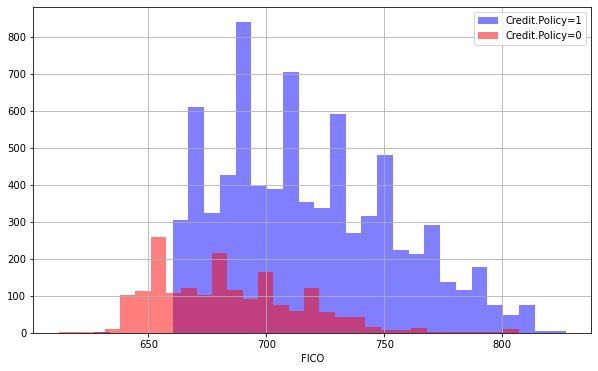

In [78]:
plt.figure(figsize=(10,6))
data[data['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
data[data['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

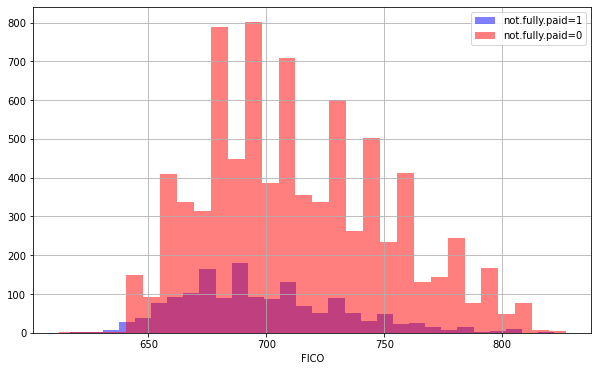

In [79]:
plt.figure(figsize=(10,6))
data[data['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
data[data['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

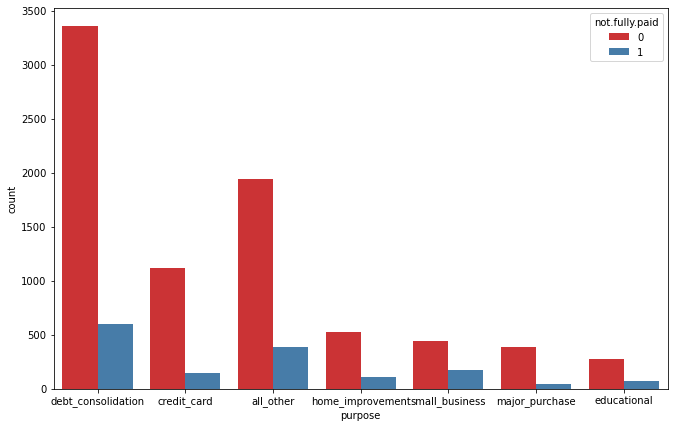

In [80]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=data,palette='Set1')

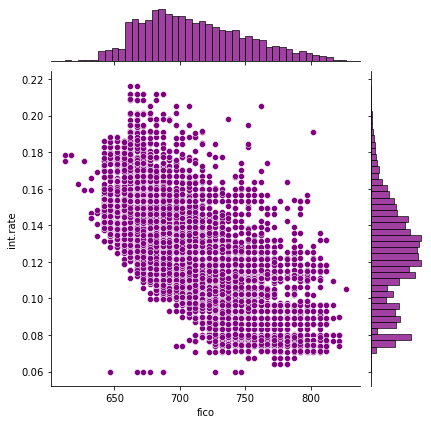

In [81]:
sns.jointplot(x='fico',y='int.rate',data=data,color='purple')

<Figure size 792x504 with 0 Axes>

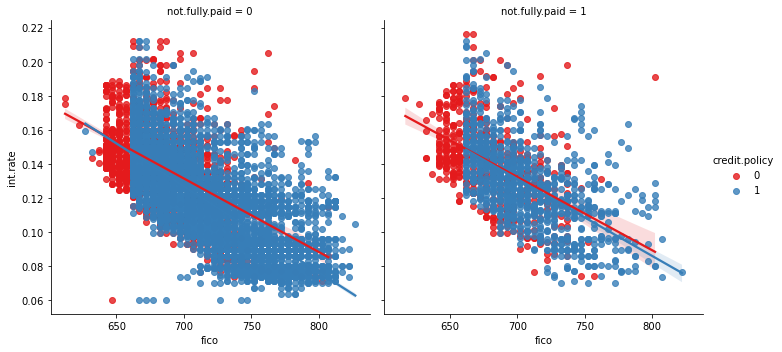

In [83]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=data,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [84]:
loan_num = data.select_dtypes(include = ['float64','int64'])
loan_num.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


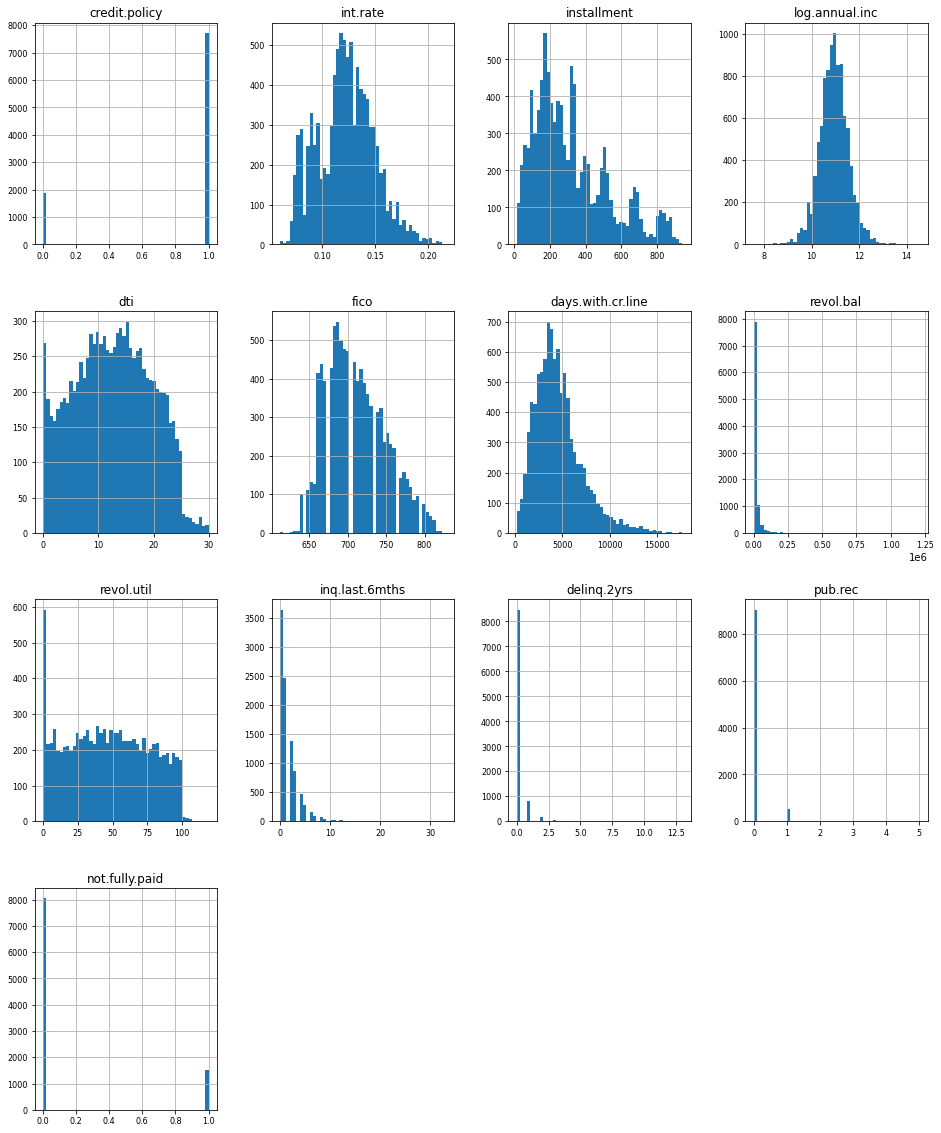

In [85]:
loan_num.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8);

# Additional Feature Engineering

## Correlation Matrix

In [89]:
cor_matrix = data.corr()
print(cor_matrix)

                   credit.policy  int.rate  installment  log.annual.inc  \
credit.policy           1.000000 -0.294089     0.058770        0.034906   
int.rate               -0.294089  1.000000     0.276140        0.056383   
installment             0.058770  0.276140     1.000000        0.448102   
log.annual.inc          0.034906  0.056383     0.448102        1.000000   
dti                    -0.090901  0.220006     0.050202       -0.054065   
fico                    0.348319 -0.714821     0.086039        0.114576   
days.with.cr.line       0.099026 -0.124022     0.183297        0.336896   
revol.bal              -0.187518  0.092527     0.233625        0.372140   
revol.util             -0.104095  0.464837     0.081356        0.054881   
inq.last.6mths         -0.535511  0.202780    -0.010419        0.029171   
delinq.2yrs            -0.076318  0.156079    -0.004368        0.029203   
pub.rec                -0.054243  0.098162    -0.032760        0.016506   
not.fully.paid         -0

In [90]:
cor_matrix1 = data.corr().abs()
print(cor_matrix1)

                   credit.policy  int.rate  installment  log.annual.inc  \
credit.policy           1.000000  0.294089     0.058770        0.034906   
int.rate                0.294089  1.000000     0.276140        0.056383   
installment             0.058770  0.276140     1.000000        0.448102   
log.annual.inc          0.034906  0.056383     0.448102        1.000000   
dti                     0.090901  0.220006     0.050202        0.054065   
fico                    0.348319  0.714821     0.086039        0.114576   
days.with.cr.line       0.099026  0.124022     0.183297        0.336896   
revol.bal               0.187518  0.092527     0.233625        0.372140   
revol.util              0.104095  0.464837     0.081356        0.054881   
inq.last.6mths          0.535511  0.202780     0.010419        0.029171   
delinq.2yrs             0.076318  0.156079     0.004368        0.029203   
pub.rec                 0.054243  0.098162     0.032760        0.016506   
not.fully.paid          0

In [94]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                   credit.policy  int.rate  installment  log.annual.inc  \
credit.policy                NaN -0.294089      0.05877        0.034906   
int.rate                     NaN       NaN      0.27614        0.056383   
installment                  NaN       NaN          NaN        0.448102   
log.annual.inc               NaN       NaN          NaN             NaN   
dti                          NaN       NaN          NaN             NaN   
fico                         NaN       NaN          NaN             NaN   
days.with.cr.line            NaN       NaN          NaN             NaN   
revol.bal                    NaN       NaN          NaN             NaN   
revol.util                   NaN       NaN          NaN             NaN   
inq.last.6mths               NaN       NaN          NaN             NaN   
delinq.2yrs                  NaN       NaN          NaN             NaN   
pub.rec                      NaN       NaN          NaN             NaN   
not.fully.paid           

C:\Users\Danish\AppData\Local\Temp\ipykernel_5992\3477284062.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


<AxesSubplot:>

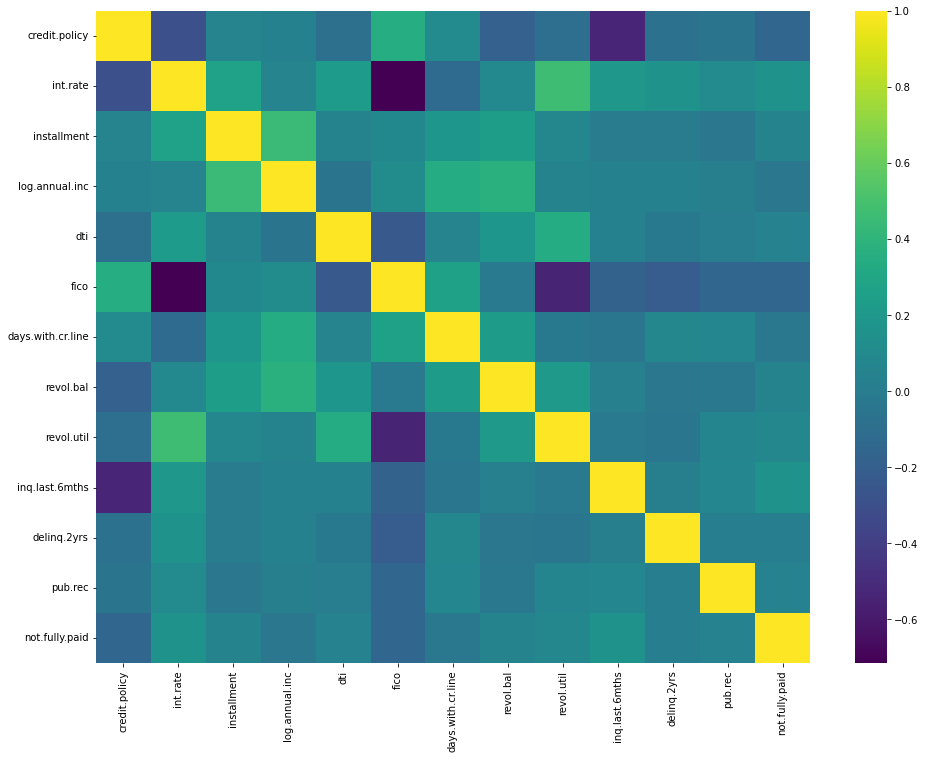

In [96]:
data.corr()
plt.figure(
        figsize=[16,12]
)
sns.heatmap(
        data=data.corr(), 
        cmap='viridis', 
        annot=False, 
        fmt='.2g'
)

In [98]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [99]:
data['not.fully.paid'].isnull().mean()
data.groupby('not.fully.paid')['not.fully.paid'].count()/len(data)

not.fully.paid
0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

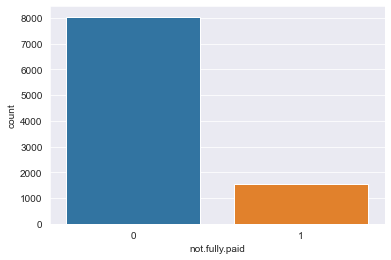

In [100]:
sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=data)

Random over-sampling:
0    8045
1    8045
Name: not.fully.paid, dtype: int64


<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

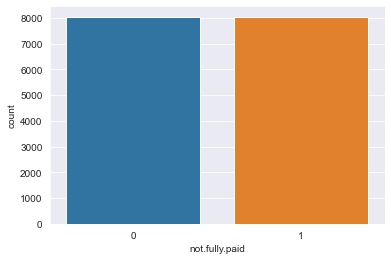

In [102]:
count_class_0, count_class_1 = data['not.fully.paid'].value_counts()
loan_0 = data[data['not.fully.paid'] == 0]
loan_1 = data[data['not.fully.paid'] == 1]
loan_1_over = loan_1.sample(count_class_0, replace=True)
loan_test_over = pd.concat([loan_0, loan_1_over], axis=0)
print('Random over-sampling:')
print(loan_test_over['not.fully.paid'].value_counts())

sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=loan_test_over)

In [103]:
col_fea = ['purpose']
final_data = pd.get_dummies(loan_test_over,columns=col_fea,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16090 entries, 0 to 8263
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               16090 non-null  int64  
 1   int.rate                    16090 non-null  float64
 2   installment                 16090 non-null  float64
 3   log.annual.inc              16090 non-null  float64
 4   dti                         16090 non-null  float64
 5   fico                        16090 non-null  int64  
 6   days.with.cr.line           16090 non-null  float64
 7   revol.bal                   16090 non-null  int64  
 8   revol.util                  16090 non-null  float64
 9   inq.last.6mths              16090 non-null  int64  
 10  delinq.2yrs                 16090 non-null  int64  
 11  pub.rec                     16090 non-null  int64  
 12  not.fully.paid              16090 non-null  int64  
 13  purpose_credit_card         1609

In [104]:
to_train = final_data[final_data['not.fully.paid'].isin([0,1])]
to_pred = final_data[final_data['not.fully.paid'] == 2]

X = to_train.drop('not.fully.paid', axis=1).values
y = to_train['not.fully.paid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()

model.add(
        Dense(19, activation='relu')
)

model.add(
        Dense(10, activation='relu')
)

model.add(
        Dense(5, activation='relu')
)


model.add(
        Dense(1, activation='sigmoid')
)
model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
)

early_stop = EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        verbose=1, 
        patience=25
)

model.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 4s 14ms/step - loss: 0.6947 - accuracy: 0.5209 - val_loss: 0.6891 - val_accuracy: 0.5420
Epoch 2/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6847 - accuracy: 0.5776 - val_loss: 0.6797 - val_accuracy: 0.5960
Epoch 3/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6680 - accuracy: 0.6061 - val_loss: 0.6615 - val_accuracy: 0.6087
Epoch 4/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6544 - accuracy: 0.6129 - val_loss: 0.6536 - val_accuracy: 0.6109
Epoch 5/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6489 - accuracy: 0.6158 - val_loss: 0.6518 - val_accuracy: 0.6122
Epoch 6/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6472 - accuracy: 0.6140 - val_loss: 0.6505 - val_accuracy: 0.6111
Epoch 7/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6453 - accuracy: 0.6178 - val_loss: 0.6495 - val_accuracy: 0.6153
Epoch 8/200


Epoch 59/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6160 - accuracy: 0.6465 - val_loss: 0.6257 - val_accuracy: 0.6511
Epoch 60/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6161 - accuracy: 0.6475 - val_loss: 0.6251 - val_accuracy: 0.6553
Epoch 61/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6161 - accuracy: 0.6491 - val_loss: 0.6246 - val_accuracy: 0.6520
Epoch 62/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6147 - accuracy: 0.6484 - val_loss: 0.6243 - val_accuracy: 0.6522
Epoch 63/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6146 - accuracy: 0.6503 - val_loss: 0.6249 - val_accuracy: 0.6484
Epoch 64/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6146 - accuracy: 0.6505 - val_loss: 0.6280 - val_accuracy: 0.6468
Epoch 65/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6154 - accuracy: 0.6490 - val_loss: 0.6240 - val_accuracy: 0.6528
Epoch 

44/44 [==============================] - 0s 5ms/step - loss: 0.6041 - accuracy: 0.6607 - val_loss: 0.6214 - val_accuracy: 0.6522
Epoch 117/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6044 - accuracy: 0.6584 - val_loss: 0.6195 - val_accuracy: 0.6598
Epoch 118/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6037 - accuracy: 0.6614 - val_loss: 0.6197 - val_accuracy: 0.6542
Epoch 119/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6039 - accuracy: 0.6602 - val_loss: 0.6201 - val_accuracy: 0.6501
Epoch 120/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6029 - accuracy: 0.6645 - val_loss: 0.6199 - val_accuracy: 0.6547
Epoch 121/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6026 - accuracy: 0.6634 - val_loss: 0.6206 - val_accuracy: 0.6565
Epoch 122/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6037 - accuracy: 0.6605 - val_loss: 0.6214 - val_accuracy: 0.6586
Epoch 123/200

44/44 [==============================] - 0s 6ms/step - loss: 0.5977 - accuracy: 0.6721 - val_loss: 0.6229 - val_accuracy: 0.6557
Epoch 174/200
44/44 [==============================] - 0s 5ms/step - loss: 0.5978 - accuracy: 0.6681 - val_loss: 0.6177 - val_accuracy: 0.6623
Epoch 175/200
44/44 [==============================] - 0s 5ms/step - loss: 0.5974 - accuracy: 0.6722 - val_loss: 0.6175 - val_accuracy: 0.6729
Epoch 176/200
44/44 [==============================] - 0s 6ms/step - loss: 0.5958 - accuracy: 0.6712 - val_loss: 0.6216 - val_accuracy: 0.6598
Epoch 177/200
44/44 [==============================] - 0s 6ms/step - loss: 0.5960 - accuracy: 0.6686 - val_loss: 0.6174 - val_accuracy: 0.6656
Epoch 178/200
44/44 [==============================] - 0s 5ms/step - loss: 0.5972 - accuracy: 0.6673 - val_loss: 0.6193 - val_accuracy: 0.6586
Epoch 179/200
44/44 [==============================] - 0s 6ms/step - loss: 0.5979 - accuracy: 0.6666 - val_loss: 0.6175 - val_accuracy: 0.6594
Epoch 180/200

<AxesSubplot:>

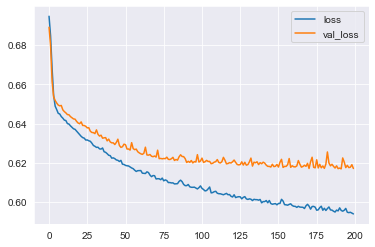

In [105]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

In [121]:
predictions = model.predict(X_test).astype('int')

print(
        confusion_matrix(y_test,predictions), 
        '\n', 
        classification_report(y_test,predictions)
)

151/151 [==============================] - 0s 2ms/step
[[2437    0]
 [2390    0]] 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      2437
           1       0.00      0.00      0.00      2390

    accuracy                           0.50      4827
   macro avg       0.25      0.50      0.34      4827
weighted avg       0.25      0.50      0.34      4827



C:\Users\Danish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Danish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Danish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
model_new = Sequential()

model_new.add(
        Dense(19, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(10, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(5, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(1, activation='sigmoid')
)

model_new.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['binary_accuracy']
)

model_new.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 3s 15ms/step - loss: 0.6919 - binary_accuracy: 0.5138 - val_loss: 0.6856 - val_binary_accuracy: 0.5426
Epoch 2/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6831 - binary_accuracy: 0.5603 - val_loss: 0.6792 - val_binary_accuracy: 0.5981
Epoch 3/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6795 - binary_accuracy: 0.5792 - val_loss: 0.6749 - val_binary_accuracy: 0.5987
Epoch 4/200
44/44 [==============================] - 0s 8ms/step - loss: 0.6777 - binary_accuracy: 0.5849 - val_loss: 0.6734 - val_binary_accuracy: 0.6056
Epoch 5/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6768 - binary_accuracy: 0.5860 - val_loss: 0.6723 - val_binary_accuracy: 0.6056
Epoch 6/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6744 - binary_accuracy: 0.5909 - val_loss: 0.6701 - val_binary_accuracy: 0.6087
Epoch 7/200
44/44 [==============================] - 0s 6ms/step - lo

44/44 [==============================] - 0s 6ms/step - loss: 0.6529 - binary_accuracy: 0.6114 - val_loss: 0.6468 - val_binary_accuracy: 0.6252
Epoch 54/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6512 - binary_accuracy: 0.6227 - val_loss: 0.6465 - val_binary_accuracy: 0.6244
Epoch 55/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6511 - binary_accuracy: 0.6180 - val_loss: 0.6461 - val_binary_accuracy: 0.6232
Epoch 56/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6514 - binary_accuracy: 0.6188 - val_loss: 0.6464 - val_binary_accuracy: 0.6254
Epoch 57/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6501 - binary_accuracy: 0.6235 - val_loss: 0.6454 - val_binary_accuracy: 0.6310
Epoch 58/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6500 - binary_accuracy: 0.6179 - val_loss: 0.6453 - val_binary_accuracy: 0.6227
Epoch 59/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6

44/44 [==============================] - 0s 6ms/step - loss: 0.6386 - binary_accuracy: 0.6331 - val_loss: 0.6331 - val_binary_accuracy: 0.6441
Epoch 106/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6376 - binary_accuracy: 0.6386 - val_loss: 0.6331 - val_binary_accuracy: 0.6457
Epoch 107/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6388 - binary_accuracy: 0.6374 - val_loss: 0.6339 - val_binary_accuracy: 0.6486
Epoch 108/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6382 - binary_accuracy: 0.6352 - val_loss: 0.6334 - val_binary_accuracy: 0.6534
Epoch 109/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6369 - binary_accuracy: 0.6394 - val_loss: 0.6329 - val_binary_accuracy: 0.6486
Epoch 110/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6362 - binary_accuracy: 0.6352 - val_loss: 0.6317 - val_binary_accuracy: 0.6511
Epoch 111/200
44/44 [==============================] - 0s 5ms/step - los

44/44 [==============================] - 0s 5ms/step - loss: 0.6283 - binary_accuracy: 0.6455 - val_loss: 0.6269 - val_binary_accuracy: 0.6563
Epoch 158/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6307 - binary_accuracy: 0.6440 - val_loss: 0.6269 - val_binary_accuracy: 0.6522
Epoch 159/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6274 - binary_accuracy: 0.6441 - val_loss: 0.6268 - val_binary_accuracy: 0.6528
Epoch 160/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6297 - binary_accuracy: 0.6428 - val_loss: 0.6255 - val_binary_accuracy: 0.6555
Epoch 161/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6280 - binary_accuracy: 0.6472 - val_loss: 0.6256 - val_binary_accuracy: 0.6588
Epoch 162/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6326 - binary_accuracy: 0.6386 - val_loss: 0.6263 - val_binary_accuracy: 0.6607
Epoch 163/200
44/44 [==============================] - 0s 5ms/step - los

<AxesSubplot:>

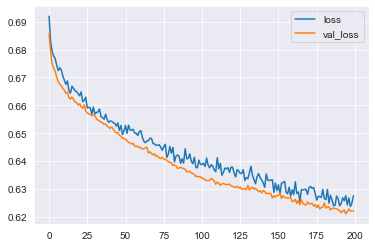

In [113]:
pd.DataFrame(model_new.history.history)[['loss','val_loss']].plot() 

In [114]:
predictions_new = (model_new.predict(X_test) >= 0.2).astype('int')

print(
        confusion_matrix(y_test,predictions_new), 
        '\n', 
        classification_report(y_test,predictions_new)
)

151/151 [==============================] - 2s 2ms/step
[[   0 2437]
 [   0 2390]] 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2437
           1       0.50      1.00      0.66      2390

    accuracy                           0.50      4827
   macro avg       0.25      0.50      0.33      4827
weighted avg       0.25      0.50      0.33      4827



C:\Users\Danish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Danish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Danish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
